Its just combination of multiple decision trees.

You divide the data into various chunks and make the decision tree on that and you take the majority vote of that

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns


In [2]:
from sklearn.datasets import load_digits
dg = load_digits()

dir(dg)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

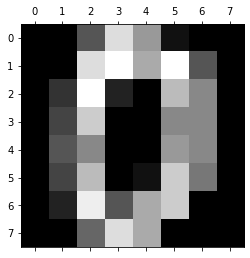

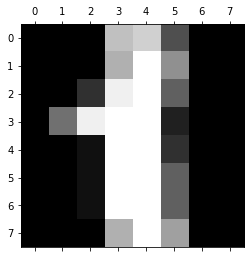

In [3]:
plt.gray()

for i in range(2):
    plt.matshow(dg.images[i])

In [4]:
df = pd.DataFrame(dg.data)
df['target'] = dg.target

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
X = df.drop('target',axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9638888888888889

In [7]:
for i in range(1,100,20):
    model = RandomForestClassifier(n_estimators = i) 
    model.fit(X_train,y_train)
    print(i," ",model.score(X_test,y_test))


1   0.7611111111111111
21   0.95
41   0.95
61   0.9472222222222222
81   0.9472222222222222


In [8]:
y_predict = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 32,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 31,  0,  0,  2,  1,  1],
       [ 0,  0,  0,  0,  1, 42,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 25]], dtype=int64)

Text(33.0, 0.5, 'truth')

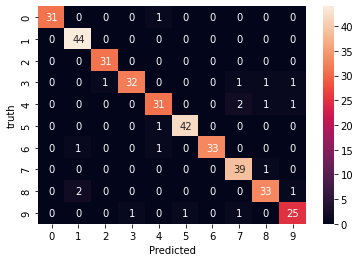

In [9]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("truth")

## Random forest by setting proper hyperparametrs


In [10]:
df = pd.read_csv("Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [11]:
df = pd.DataFrame(df)
df = df[['Age','Sex','RestBP','Chol','AHD']]
df.head()

,Age,Sex,RestBP,Chol,AHD
0,63,1,145,233,No
1,67,1,160,286,Yes
2,67,1,120,229,Yes
3,37,1,130,250,No
4,41,0,130,204,No


In [12]:
df['AHD'].replace(['No','Yes'],[0,1],inplace=True)
df.head()

,Age,Sex,RestBP,Chol,AHD
0,63,1,145,233,0
1,67,1,160,286,1
2,67,1,120,229,1
3,37,1,130,250,0
4,41,0,130,204,0


In [13]:
X = df.drop("AHD",axis=1)
y = df['AHD']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
model_rf = RandomForestClassifier(random_state = 2,n_jobs=-1,max_depth=5,oob_score=True)

model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=2)

In [15]:
model_rf.oob_score_

0.6033057851239669

In [16]:
## since the score on oob segment is low
## lets use gridsearch cv

rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [17]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [18]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [19]:
grid_search.best_score_

0.6650273224043716

In [20]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)